## Contrast Limited Adaptive Histogram Equalisation

In [29]:
path = 'C:\IITGN 2nd year\ES 204 Digital Systems\Local-Contrast-Enhancement-of-Image\Local Contrast Enhancement of Image\\141.jpg'
import matplotlib.image as Image
import numpy as np
import matplotlib.pyplot as plt

(150, 150)


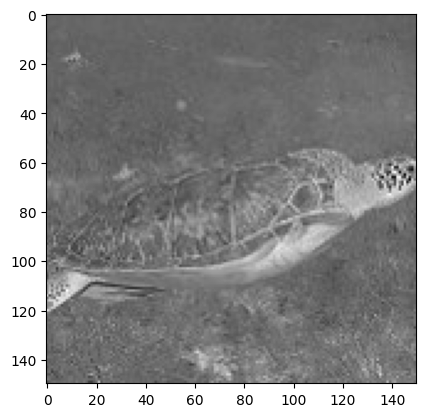

In [30]:
img= Image.imread(path)
#img = (img * 255).astype(np.uint8)
print (img.shape)
plt.imshow(img, cmap='gray')

In [31]:
window_size= (30,30)
print(img)

[[ 93  94  95 ...  90  93  94]
 [ 91  92  92 ...  88  90  91]
 [ 90  92  93 ...  90  91  92]
 ...
 [104 100  95 ... 127 108 109]
 [114 103  88 ... 105 109 112]
 [ 77  90 100 ... 116 118 101]]


[[ 78  81  85 ...  66  76  79]
 [ 71  75  75 ...  59  66  69]
 [ 68  75  78 ...  66  69  72]
 ...
 [105  93  77 ... 157 100 103]
 [136 102  55 ...  90 103 112]
 [ 28  62  93 ... 125 131  78]]


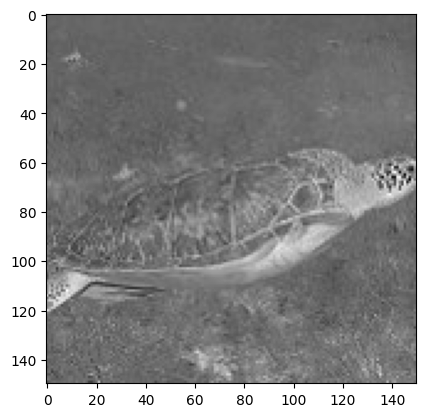

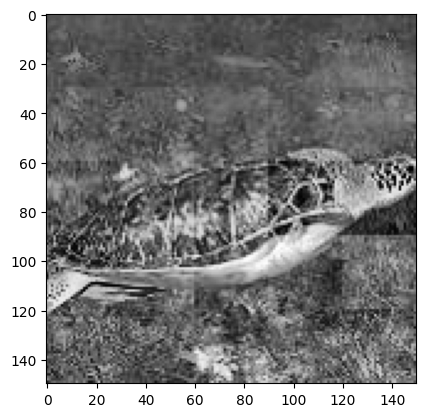

In [32]:
equalised_img = np.copy(img)
clip_lim = 10

for i in range(0,img.shape[0], window_size[0]):
    for j in range(0,img.shape[1], window_size[1]):
        window = img[i:i+window_size[0], j:j+window_size[1]]
        w_1d = window.flatten()
        
        intensity=np.zeros(256)
        for pix in w_1d:
            intensity[pix]+=1

        excess_pix = np.maximum(intensity-clip_lim, 0) # no. of pixels above clip limit
        clipped_hist = intensity - excess_pix  # subtracting the excess value
        excess_sum = np.sum(excess_pix)

        redistribute = excess_sum//256  # amount of excess sum redistributed to each pixel
        clipped_hist += redistribute

        pdf = clipped_hist

        cdf = np.zeros(256)
        cdf[0] = pdf[0]
        for k in range (1,256):
            cdf[k]=cdf[k-1]+pdf[k]
        
        cdf_normalised = (cdf - cdf[cdf>0].min())/(w_1d.size-cdf[cdf>0].min())
        histo_equal = np.round(cdf_normalised*255).astype(np.uint8)
        equalised_img[i:i+window_size[0], j:j+window_size[1]] = histo_equal[window]

print(equalised_img)
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(equalised_img, cmap='gray')
